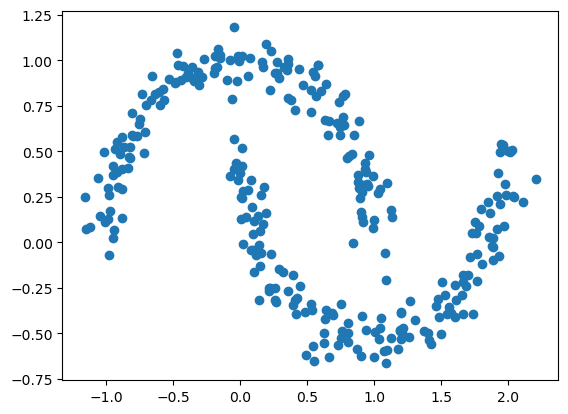

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(300, noise=.08, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

In [36]:
X.shape

(300, 2)

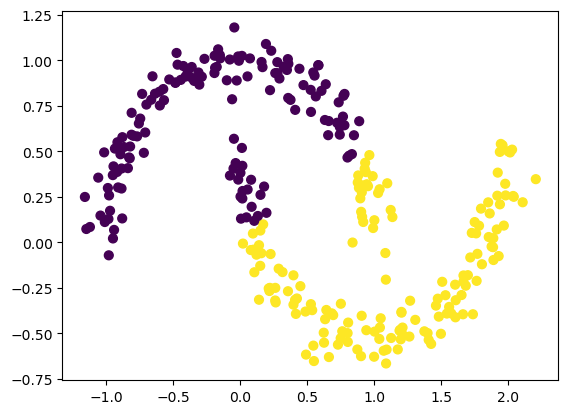

In [4]:
#Apply GMM
#Applying GMM:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [ ]:
# The model dint fit as some data points in Class 1 are closer to points in class 2 
#and hence their probablitiy is higher to be in Class 2 

# we can solve this by creating small clusters

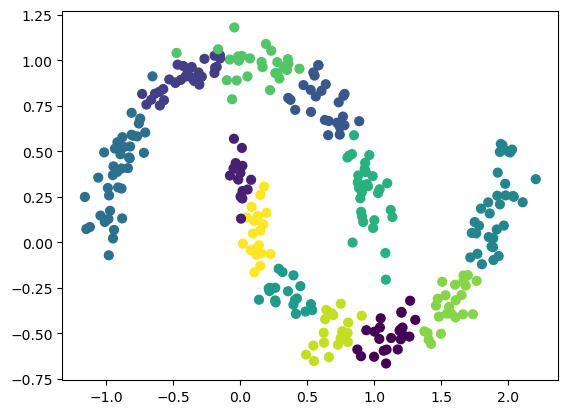

In [26]:
from sklearn.mixture import GaussianMixture as GMM
gmm12 = GMM(n_components=12)
gmm12.fit(X)
labels = gmm12.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

In [37]:
X.shape

(300, 2)

(100, 2)

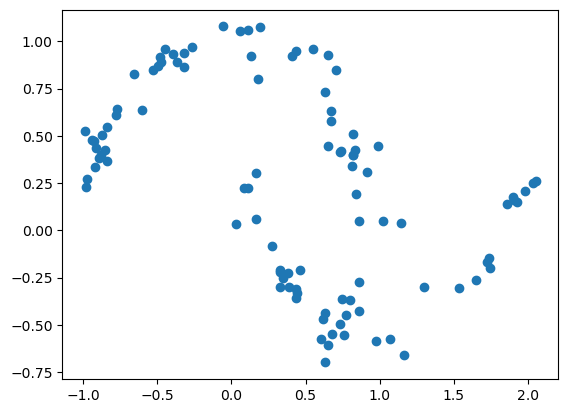

In [41]:
Xnew = gmm12.sample(100)
Xnew=Xnew[0]
plt.scatter(Xnew[:, 0], Xnew[:, 1]);
Xnew.shape

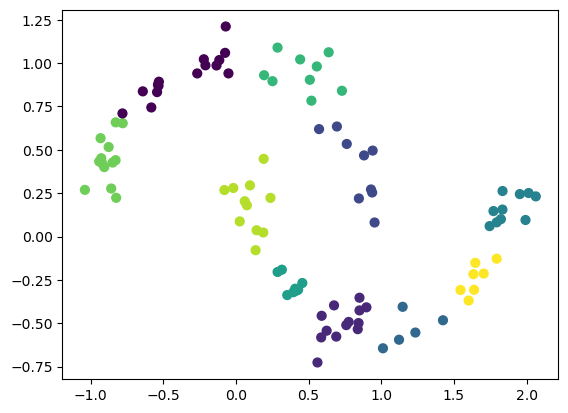

In [38]:
gmm12 = GMM(n_components=10)
gmm12.fit(Xnew)
labels = gmm12.predict(Xnew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=labels, s=40, cmap='viridis')

In [39]:
Xnew.shape

(100, 2)

In [ ]:
#generate some face images from LFW dataset using the GMM based generative model.

In [42]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=150)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'George W Bush']
(766, 62, 47)


In [43]:
import numpy as np
newarr = faces.images.reshape(766, 62*47)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(0.999999)
data = pca.fit_transform(newarr)
data.shape

(766, 765)

In [45]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=500, max_iter=10000,)
gmm.fit(data)
labels = gmm.predict(data)
labels.shape

(766,)

In [48]:
#Generating 20 new points:
data_new = gmm.sample(20)
dataf=data_new[0]

In [50]:
dataf.shape

(20, 765)

In [51]:
dataf = pca.inverse_transform(dataf)
dataf.shape

(20, 2914)

In [55]:
im = dataf.reshape(20, 62, 47)

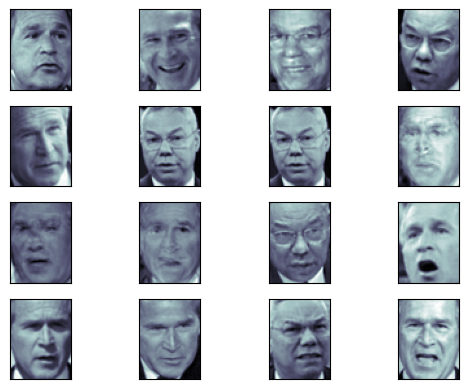

In [56]:
fig, ax = plt.subplots(4, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(im[i], cmap='bone')
    axi.set(xticks=[], yticks=[])